In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
import lupu

%matplotlib inline

In [2]:
df = pd.read_csv('./data/Reviews.csv')

In [3]:
df.shape

(568454, 10)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


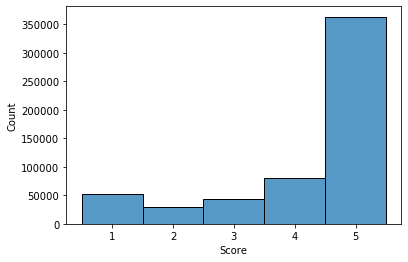

In [4]:
sb.histplot(df['Score'], binwidth=1, binrange=[0.5, 5.5])

In [5]:
df['Sentiment'] = df['Score'].map({5: 1, 4: 0.5, 3: 0, 2: -0.5, 1: -1})

In [6]:
lupu = lupu.Lupu()

In [7]:
df2 = df[['Id', 'Text', 'Sentiment']]

In [8]:
df2.head()

,Id,Text,Sentiment
0,1,I have bought several of the Vitality canned d...,1
1,2,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,This is a confection that has been around a fe...,0
3,4,If you are looking for the secret ingredient i...,-1
4,5,Great taffy at a great price. There was a wid...,1


In [9]:
X = df2['Text']

In [10]:
X = lupu.simple_preprocess(X)

In [11]:
X[1]

'product arrived labeled jumbo salted peanut peanut actually small sized unsalted sure error vendor intended represent product jumbo'

In [13]:
df2['Text'] = X

C:\Users\ctoh8\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2.head()

,Id,Text,Sentiment
0,1,bought several vitality canned dog food produc...,1
1,2,product arrived labeled jumbo salted peanut pe...,-1
2,3,confection around century light pillowy citrus...,0
3,4,looking secret ingredient robitussin believe f...,-1
4,5,great taffy great price wide assortment yummy ...,1


In [15]:
df2.to_csv('./data/cleaned_reviews.csv', index=False)